In [1]:
from pathlib import Path
from src.analysis.behavioral_profile import behavioral_dimensions

MODEL_NAME = "llama3"
base_out_dir = Path("relevant_runs_copies") / "main_runs_copies"
questions_out_dir = base_out_dir / f"{MODEL_NAME}_v10_questions"
ws100_out_dir = base_out_dir / f"{MODEL_NAME}_AD_ws100"
urnd_out_dir = base_out_dir / f"{MODEL_NAME}_URNDx_ws10"
other_strats_dir = base_out_dir / f"{MODEL_NAME}_other_strats"
rnd_out_dir = base_out_dir / f"RND_URNDx"


tft_dir = other_strats_dir / "TFT"
grim_dir = other_strats_dir / "GRIM"
wsls_dir = other_strats_dir / "WSLS"

c_blue1 = '#5c509d'
c_green1 = '#7dc0a7'
c_green2 = '#39d05c'
c_violet1 = '#301466'
c_gray1 = '#444444'
c_orange1 = '#ECA72C'

checkers_names = ["time", "rule", "aggregation"]  # TODO FIX CHECKERS NAMES
comprehension_questions_labels = ['min_max', 'actions', 'payoff', 'round', 'action$_i$', 'points$_i$', '#actions', '#points']
sfem_strategies_labels = ['AD', 'RND', 'AC', 'TFT', 'STFT', 'GRIM', 'WSLS']
sfem_opponents_labels = ['RND', 'TFT', 'STFT', 'GRIM', 'WSLS']
comprehension_questions_dir = "comprehension_questions"
window_size_effect_dir = "window_size_effect"
behavioral_analysis_dir = "behavioral_analysis"
urnd_str = "URND{p:02}"
rnd_str = "RND"
confidence = 0.95

max_p = 10

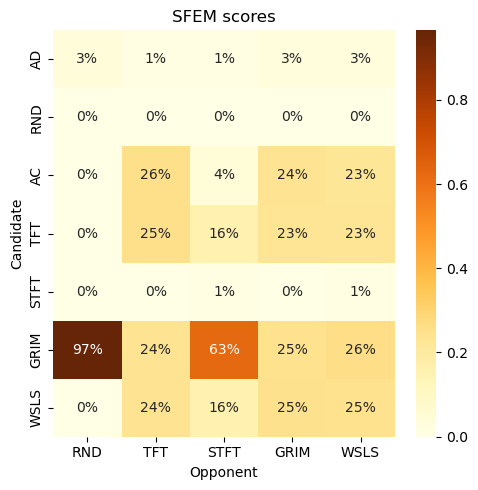

In [2]:
from user_interface_utils import create_csv_sfem_other_strats_results, plot_sfem_matrix

# create_csv_sfem_other_strats_results(other_strats_dir, sfem_opponents_labels)
plot_sfem_matrix(other_strats_dir, sfem_strategies_labels)

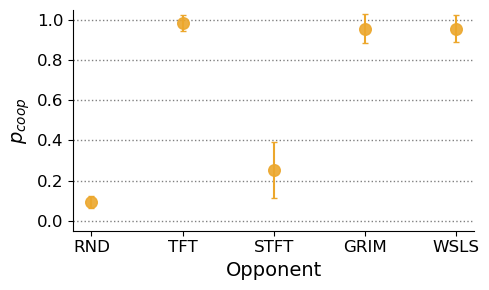

In [3]:
from user_interface_utils import create_csv_cooperation_probability_other_strats_results, plot_coop_probability_vs_other_strats

# create_csv_cooperation_probability_other_strats_results(other_strats_dir, sfem_opponents_labels)
plot_coop_probability_vs_other_strats(other_strats_dir, MODEL_NAME)

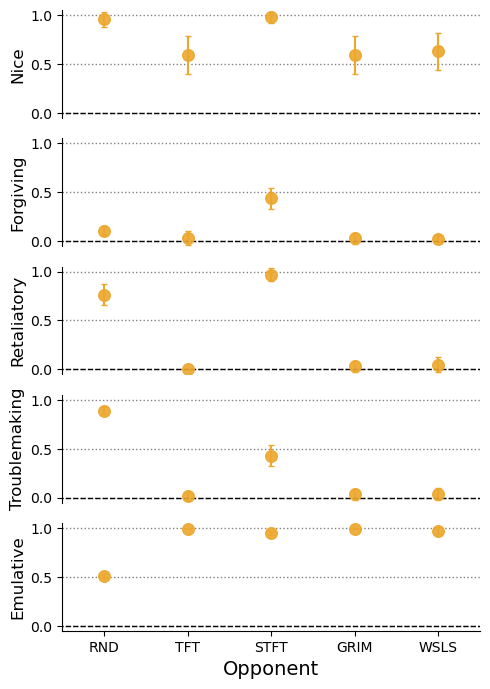

In [4]:
from user_interface_utils import create_csv_behavioral_profile_other_strats_results, plot_behavioral_profile_vs_other_strats

# create_csv_behavioral_profile_other_strats_results(other_strats_dir, MODEL_NAME, sfem_opponents_labels)
plot_behavioral_profile_vs_other_strats(other_strats_dir, MODEL_NAME, sfem_opponents_labels)

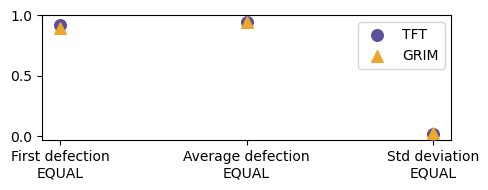

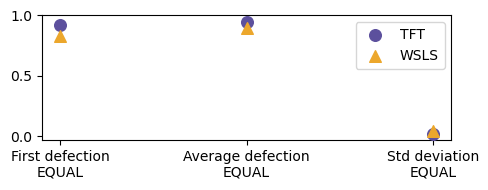

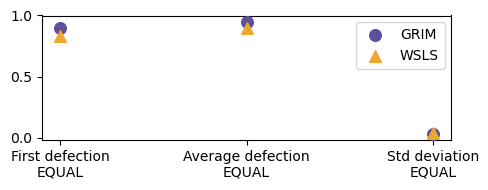

In [3]:
from user_interface_utils import create_csv_statistical_tests, plot_statistical_tests

# create_csv_statistical_tests(tft_dir)
# create_csv_statistical_tests(grim_dir)
# create_csv_statistical_tests(wsls_dir)
# create_csv_statistical_tests(rnd_out_dir / "URND05")

dirs = [tft_dir, grim_dir, wsls_dir]
# 
# for dir in dirs:
#     plot_statistical_tests(other_strats_dir, rnd_out_dir / "URND05", rnd_str, dir, dir.name)

for idx1 in range(len(dirs)):
    for idx2 in range(idx1+1,len(dirs)):
        d1 = dirs[idx1]
        d2 = dirs[idx2]
        if d1 != d2:
            plot_statistical_tests(other_strats_dir, d1, d1.name, d2, d2.name)


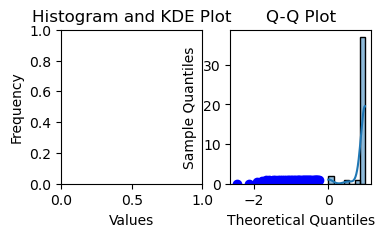

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


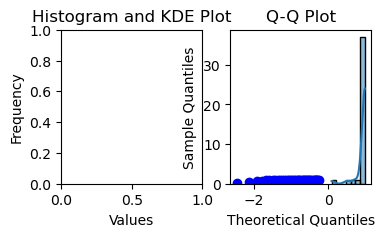

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


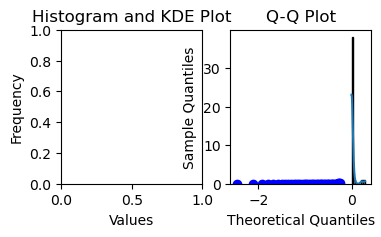

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


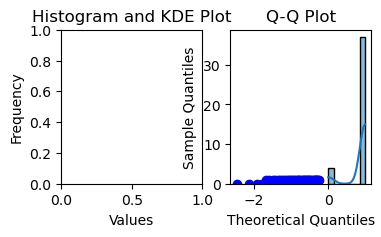

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


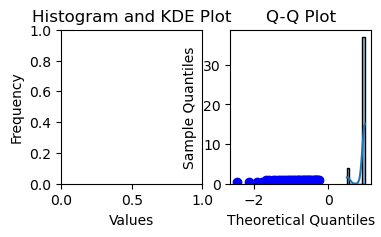

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


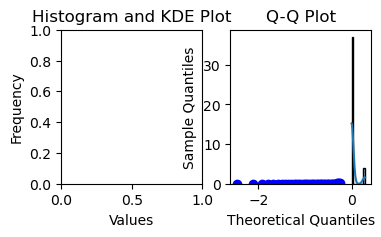

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


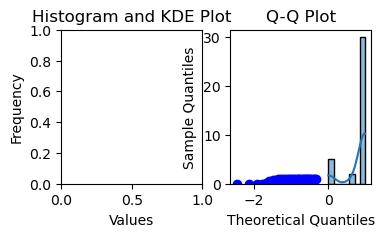

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


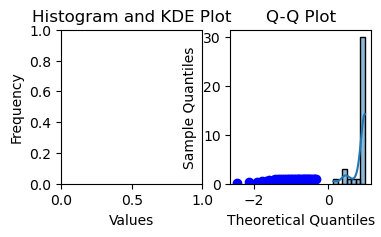

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


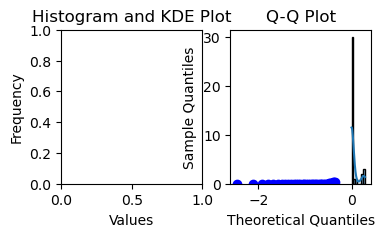

Shapiro-Wilk Test: statistic=nan, p-value=1.0
Sample looks Gaussian (fail to reject H0)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats

names = ["first_defection.csv", "avg_defection.csv", "std_defection.csv"]

for dir in dirs:
    for name in names:
        df = pd.read_csv(dir / name)
        data = df.iloc[:, 1]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))

        # Plot histogram
        sns.histplot(data, kde=True)
        ax1.set_title('Histogram and KDE Plot')
        ax1.set_xlabel('Values')
        ax1.set_ylabel('Frequency')
            
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=plt)
        ax2.set_title('Q-Q Plot')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Sample Quantiles')
        plt.show()
        
        # Shapiro-Wilk test for normality
        stat, p_value = shapiro(data)
        print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p_value}")
        
        # Interpret the p-value
        alpha = 0.05
        if p_value > alpha:
            print("Sample looks Gaussian (fail to reject H0)")
        else:
            print("Sample does not look Gaussian (reject H0)")


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='Round'>)

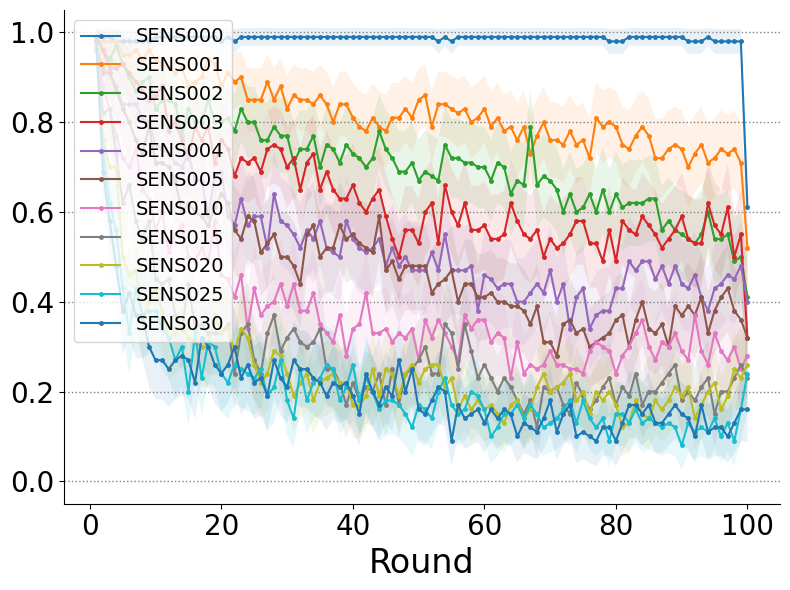

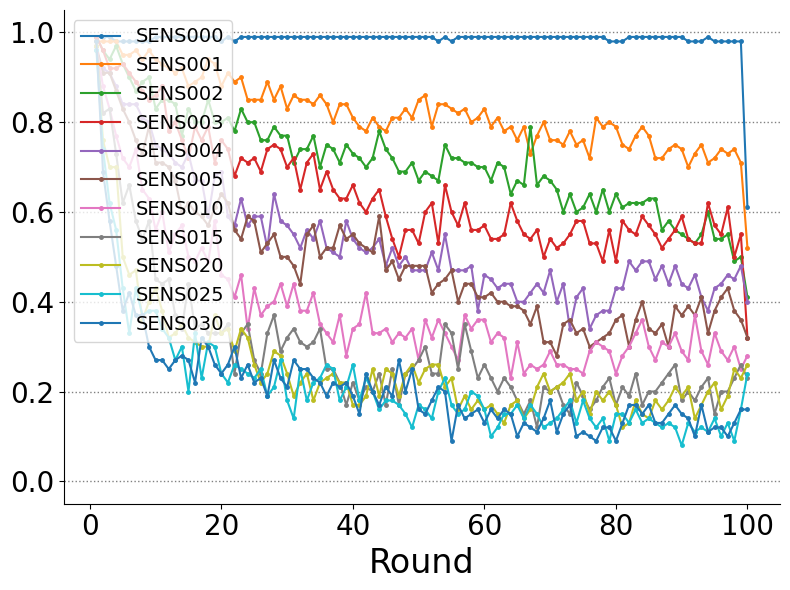

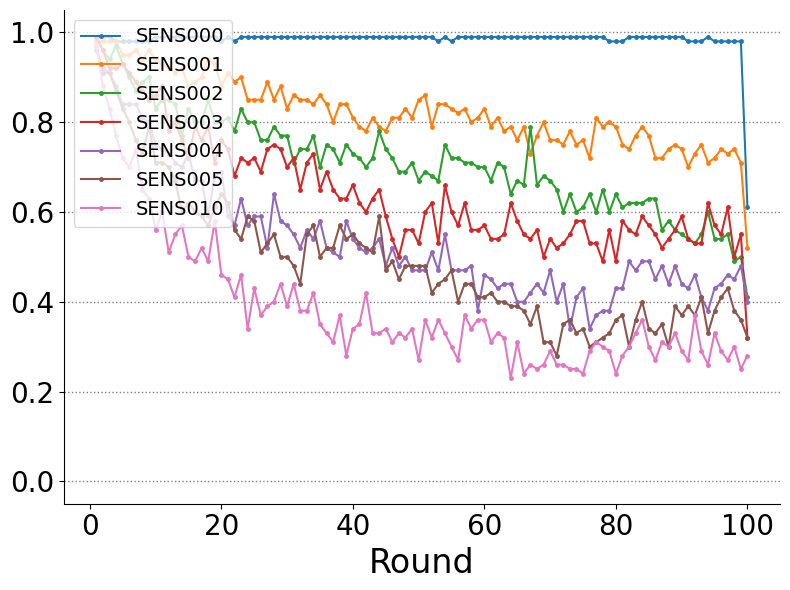

In [5]:
from user_interface_utils import plot_cooperation_comparison, create_csv_average_cooperation_per_round

tft_sensitivity_dir = tft_dir / "sensitivity"
out_fig_name = f"{MODEL_NAME}_sensitvity_comparison"

dirs = []
labels = []
for i in range(5):
    sens_str = f'SENS{i:03}'
    sens_dir = tft_sensitivity_dir / sens_str if i != 0 else tft_dir
    dirs.append(sens_dir)
    labels.append(sens_str)
    # create_csv_average_cooperation_per_round(sens_dir)
for i in range(0, 31, 5):
    sens_str = f'SENS{i:03}'
    if i != 0:
        sens_dir = tft_sensitivity_dir / sens_str
        dirs.append(sens_dir)
        labels.append(sens_str)
    # create_csv_average_cooperation_per_round(sens_dir)
plot_cooperation_comparison(tft_sensitivity_dir, MODEL_NAME, dirs, labels, out_fig_name=out_fig_name, with_confidence_intervals=True)
plot_cooperation_comparison(tft_sensitivity_dir, MODEL_NAME, dirs, labels, out_fig_name=out_fig_name, with_confidence_intervals=False)
plot_cooperation_comparison(tft_sensitivity_dir, MODEL_NAME, dirs[:-4], labels, out_fig_name=out_fig_name, with_confidence_intervals=False)